## Tensorflow 선형회귀 실습
- 임의로 정한 1차 함수를 통해 1000개의 값을 생성한다
- 전체 데이터를 시각화하여 확인한다
- 데이터를 학습용, 검증용으로 분리한다
- 선형회귀용 신경망을 생성한다
- 신경망을 학습한다
- 학습내역을 시각화해서 학습상태를 확인한다
- model.evaluate()로 오차를 확인
- model.predict()로 전체 데이터에 대한 추정치를 얻는다
- 차트에 전체 데이터를 시각화, 그 위에 추정된 값 시각화
- 1차함수의 예(y = ax + b)
- a,b는 임의로 정하여 x에 0~1000의 값을 대입하여 y를 얻는다

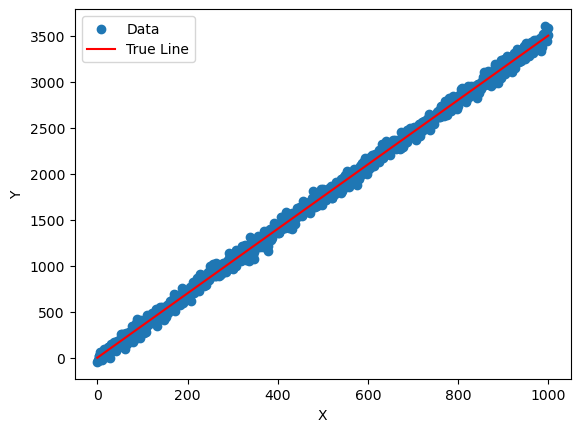

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: nan - val_loss: nan
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 11/100
25/25 [==============================] - 0s 4ms/step - 

25/25 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 89/100
25/25 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 93/100
25/25 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 94/100
25/25 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 95/100
25/25 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 96/100
25/25 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 97/100
25/25 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 98/100
25/25 [==============================] - 0s 2ms/step - loss:

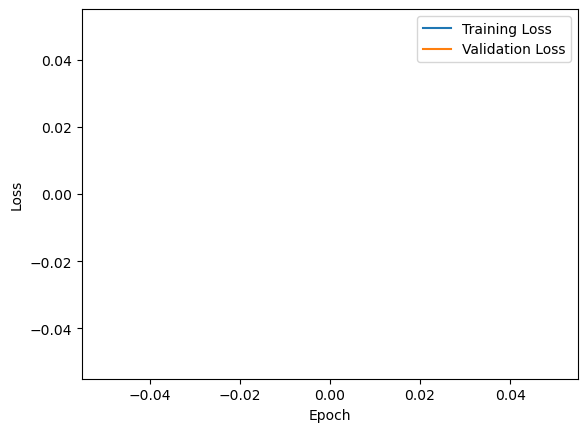

7/7 [==============================] - 0s 2ms/step - loss: nan
Validation Loss: nan
32/32 [==============================] - 0s 740us/step


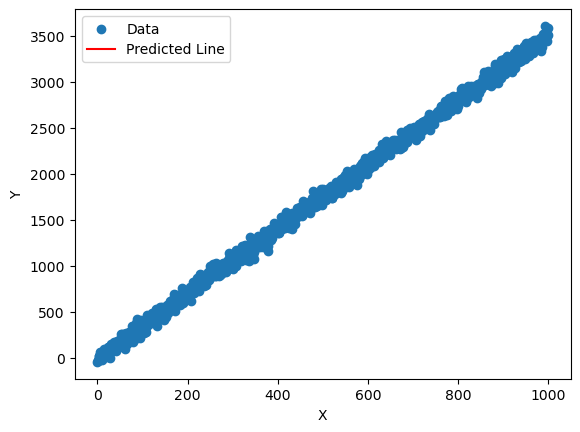

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1차 함수 y = ax + b에서 a와 b를 임의로 설정
a_true = 3.5
b_true = 2.0

# 데이터 생성
num_samples = 1000
x_data = np.linspace(0, 1000, num_samples)
y_data = a_true * x_data + b_true + np.random.normal(0, 50, num_samples)  # 노이즈 추가

# 데이터 시각화
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, a_true * x_data + b_true, color='red', label='True Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# 데이터 분할 (학습용과 검증용)
split_ratio = 0.8
split_idx = int(num_samples * split_ratio)
x_train, x_val = x_data[:split_idx], x_data[split_idx:]
y_train, y_val = y_data[:split_idx], y_data[split_idx:]

# 선형 회귀 모델 구성
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

# 모델 컴파일
model.compile(optimizer='sgd', loss='mean_squared_error')

# 모델 학습
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

# 학습 결과 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 모델 평가
loss = model.evaluate(x_val, y_val)
print("Validation Loss:", loss)

# 전체 데이터에 대한 추정치 계산
y_pred = model.predict(x_data)

# 전체 데이터 시각화
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, y_pred, color='red', label='Predicted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
